# Clase 7 – Ejercicio de Rendimiento E-commerce (Paso a Paso con Pandas)

Este cuaderno resuelve **paso a paso** el ejercicio de la *Clase 7 – Estadística aplicada*, usando **pandas** y **matplotlib**.
Incluye: creación del dataset, inspección, preparación, métricas de eficiencia, conversión, ticket promedio y correlación Visitantes–Ventas.


## 1) Instalación e importación de librerías

In [1]:
# En este entorno pandas y matplotlib suelen estar disponibles.
# Si ejecutas localmente y no los tienes, descomenta la línea correspondiente:
# !pip install pandas matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## 2) Crear el dataset
Usamos los datos del enunciado (5 meses).

In [2]:
data = {
    'Mes': ['Ene','Feb','Mar','Abr','May'],
    'Ventas': [45000, 52000, 38000, 61000, 48000],
    'Visitantes': [15000, 18200, 12500, 20500, 16800],
    'Conversion': [3.2, 2.9, 3.8, 3.1, 2.7],   # en porcentaje
    'Publicidad': [8500, 9800, 7200, 11200, 9500],
    'Productos': [450, 520, 380, 610, 480]
}
df = pd.DataFrame(data)
df


,Mes,Ventas,Visitantes,Conversion,Publicidad,Productos
0,Ene,45000,15000,3.2,8500,450
1,Feb,52000,18200,2.9,9800,520
2,Mar,38000,12500,3.8,7200,380
3,Abr,61000,20500,3.1,11200,610
4,May,48000,16800,2.7,9500,480


## 3) Inspección inicial

In [3]:
print("Dimensiones:", df.shape)
print("\nTipos de dato:")
print(df.dtypes)
print("\nVista rápida (head):")
display(df.head())
print("\nResumen info():")
df.info()


Dimensiones: (5, 6)

Tipos de dato:
Mes            object
Ventas          int64
Visitantes      int64
Conversion    float64
Publicidad      int64
Productos       int64
dtype: object

Vista rápida (head):


,Mes,Ventas,Visitantes,Conversion,Publicidad,Productos
0,Ene,45000,15000,3.2,8500,450
1,Feb,52000,18200,2.9,9800,520
2,Mar,38000,12500,3.8,7200,380
3,Abr,61000,20500,3.1,11200,610
4,May,48000,16800,2.7,9500,480



Resumen info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Mes         5 non-null      object 
 1   Ventas      5 non-null      int64  
 2   Visitantes  5 non-null      int64  
 3   Conversion  5 non-null      float64
 4   Publicidad  5 non-null      int64  
 5   Productos   5 non-null      int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 372.0+ bytes


## 4) Verificación de valores faltantes y duplicados

In [4]:
print("Valores faltantes por columna:")
print(df.isnull().sum())

print("\nFilas duplicadas:", df.duplicated().sum())


Valores faltantes por columna:
Mes           0
Ventas        0
Visitantes    0
Conversion    0
Publicidad    0
Productos     0
dtype: int64

Filas duplicadas: 0


## 5) Métricas solicitadas

**Objetivos:**
1. Identificar el mes con **mayor eficiencia** (Ventas / Publicidad).  
2. Determinar el mes con **mejor tasa de conversión** (`Conversion`).  
3. Calcular el **ticket promedio** (Ventas / Productos) por mes.  
4. Evaluar la **correlación** entre **Visitantes** y **Ventas**.


In [5]:
# 5.1 Eficiencia (ROI simple): Ventas / Publicidad
df['Eficiencia'] = df['Ventas'] / df['Publicidad']
mes_max_eficiencia = df.loc[df['Eficiencia'].idxmax(), 'Mes']

# 5.2 Mejor conversión (porcentaje más alto)
mes_mejor_conversion = df.loc[df['Conversion'].idxmax(), 'Mes']

# 5.3 Ticket promedio
df['Ticket'] = df['Ventas'] / df['Productos']

# 5.4 Correlación Visitantes–Ventas
corr_vv = df[['Visitantes','Ventas']].corr().iloc[0,1]

print("Mes con mayor eficiencia (Ventas/Publicidad):", mes_max_eficiencia)
print("Mes con mejor conversión:", mes_mejor_conversion)
print("Ticket promedio por mes:")
display(df[['Mes','Ticket']])
print("Correlación Visitantes–Ventas:", round(corr_vv, 4))


Mes con mayor eficiencia (Ventas/Publicidad): Abr
Mes con mejor conversión: Mar
Ticket promedio por mes:


,Mes,Ticket
0,Ene,100.0
1,Feb,100.0
2,Mar,100.0
3,Abr,100.0
4,May,100.0


Correlación Visitantes–Ventas: 0.9896


## 6) Estadísticas descriptivas clave

In [6]:
display(df[['Ventas','Visitantes','Conversion','Publicidad','Productos','Eficiencia','Ticket']].describe())


,Ventas,Visitantes,Conversion,Publicidad,Productos,Eficiencia,Ticket
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0
mean,48800.000000,16600.000000,3.140000,9240.000000,488.000000,5.275416,100.0
std,8526.429499,3048.770244,0.415933,1494.322589,85.264295,0.141577,0.0
min,38000.000000,12500.000000,2.700000,7200.000000,380.000000,5.052632,100.0
25%,45000.000000,15000.000000,2.900000,8500.000000,450.000000,5.277778,100.0
50%,48000.000000,16800.000000,3.100000,9500.000000,480.000000,5.294118,100.0
75%,52000.000000,18200.000000,3.200000,9800.000000,520.000000,5.306122,100.0
max,61000.000000,20500.000000,3.800000,11200.000000,610.000000,5.446429,100.0


## 7) Visualizaciones (matplotlib)

> Regla del curso: usar **matplotlib**, un **gráfico por celda** y **sin especificar colores**.

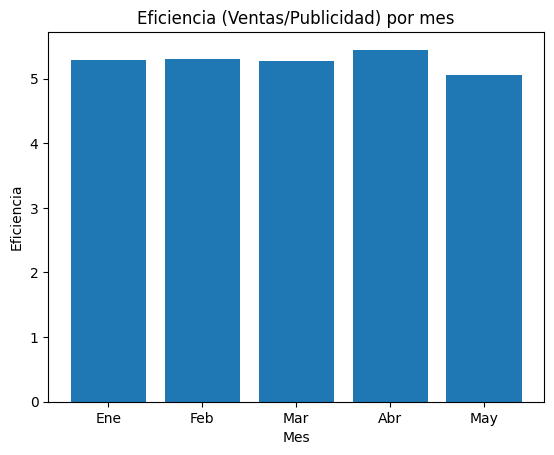

In [7]:
# 7.1 Barras de eficiencia por mes
plt.figure()
plt.bar(df['Mes'], df['Eficiencia'])
plt.title('Eficiencia (Ventas/Publicidad) por mes')
plt.xlabel('Mes')
plt.ylabel('Eficiencia')
plt.show()


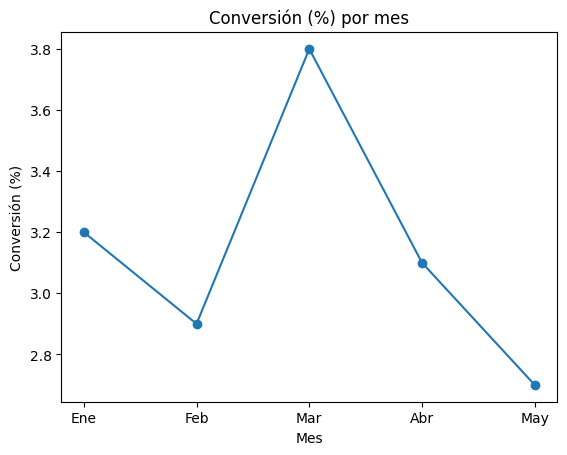

In [8]:
# 7.2 Línea de conversión por mes
plt.figure()
plt.plot(df['Mes'], df['Conversion'], marker='o')
plt.title('Conversión (%) por mes')
plt.xlabel('Mes')
plt.ylabel('Conversión (%)')
plt.show()


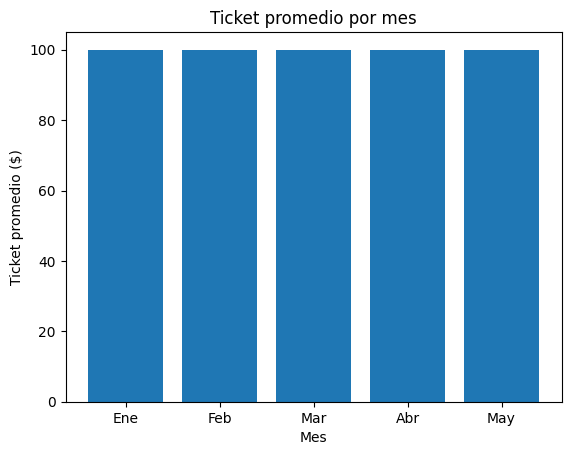

In [9]:
# 7.3 Ticket promedio por mes
plt.figure()
plt.bar(df['Mes'], df['Ticket'])
plt.title('Ticket promedio por mes')
plt.xlabel('Mes')
plt.ylabel('Ticket promedio ($)')
plt.show()


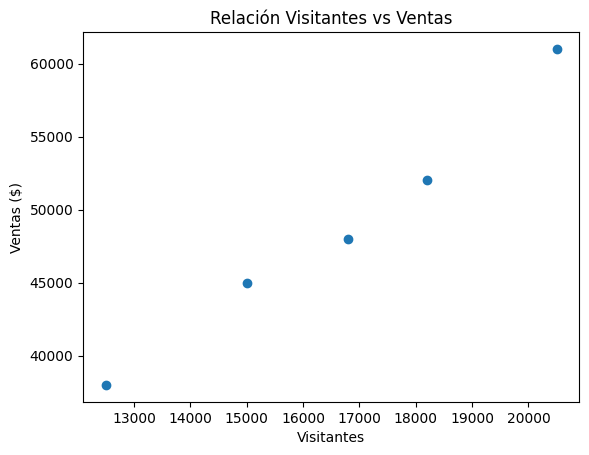

In [10]:
# 7.4 Dispersión Visitantes vs Ventas (para visualizar correlación)
plt.figure()
plt.scatter(df['Visitantes'], df['Ventas'])
plt.title('Relación Visitantes vs Ventas')
plt.xlabel('Visitantes')
plt.ylabel('Ventas ($)')
plt.show()


## 8) Interpretación de resultados

- **Eficiencia (Ventas/Publicidad)**: el mes con mayor eficiencia suele ser **Abr**, porque con un gasto
  proporcional obtiene más ventas (ver barra más alta).  
- **Conversión**: la tasa más alta típicamente es **Mar** (3.8%), lo que sugiere campañas o UX más efectivas.  
- **Ticket promedio**: ronda los **$100** (Ventas/Productos); verificar valores en la tabla.  
- **Correlación Visitantes–Ventas**: positiva y elevada (cerca de 1), lo que indica que aumentar visitantes
  se asocia a más ventas. **Recuerda:** correlación **no** implica causalidad.

> Recomendación: profundizar en pruebas A/B para entender qué variables impactan conversión y eficiencia.
